# Homework nr. 1 - data visualization (deadline 25/10/2018)

In short, the main task is to download data on theses defended at CTU from the Internet, store them in pandas Data Frame and then visualize some hidden information.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can. Thinking of how to visualize the data is an important part of data visualization! ;)

## What are you supposed to do:

  1. Browse the web https://dspace.cvut.cz/?locale-attribute=en and find out how to download data on Bachelor and Master theses.
  2. Download or scrape the data such that for each thesis you know the following:
    * Faculty name, department name, thesis title, thesis type (bachelor/master), supervisor name, reviewer name, year (or date) of the defence, study programme and discipline, link to a webpage with details.
  3. Store these data in one _csv_ file (should be handed in along with this notebook).
  4. Use tools available for Python to plot charts and tables to visualize/display this information:
    * Number of defended theses per year for CTU/Faculties. Distinguish the type of thesis.
    * Find the departments/study programmes/supervisors/reviewers with highest numbers of thesis and come up with some nice plots and tables to depict their numbers.
    * Mean/median/minimum/maximum number of supervised theses per year for faculties.
    * Number (or fraction) of theses supervised by people with various degrees (Bc./Ing./Ph.D./ ...).

**If you do all this properly, you will obtain 6 points**

To earn **extra two points** you can do some of these:
  * Use http://beakerx.com to make your notebook interactive in a meaningful way.
  * Come up with some other reasonable and interesting views of data.
  * Use your data to create an interactive webpage (HTML + JavaScript).

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, he can give you another chance to rework your homework and to obtain more points.

### Answers :

1) The cell below allows you to download data from 1000 thesis. This piece of code answers point 1, 2 and 3 since it stores at the end, all the scrapped data in a CSV.

As you can see the conversion to CSV line is commented because we will directly use the dataframe from the cell below in the next cells.

You can change the value of i to something like 64950 in order to have a dataframe of 50 thesis so that you can then execute the other cells.

In [2]:
import numpy as np
import pandas as pd
import sklearn as skit
import requests
from bs4 import BeautifulSoup

i = 64000
url = 'https://dspace.cvut.cz/handle/10467/{}?show=full'
data_all = pd.DataFrame()

columns_drop = {"dc.date.accessioned", "dc.date.available", "dc.identifier", "dc.rights",
"dc.publisher"}

columns_rename = {"dc.contributor.author" : "author", "dc.contributor.advisor" : "advisor", "dc.description.abstract" : "abstract", "dc.contributor.referee" : "referee", "dc.date.issued" : "issued-date",
       "dc.date.accepted" : "accepted-date", "dc.description.department" : "department_name", "dc.identifier.uri" : "url",
       "dc.title" : "title", "theses.degree.discipline" : "degree_discipline", "theses.degree.grantor" : "degree_grantor",
       "theses.degree.name" : "degree_name", "theses.degree.programme" : "study_program", "dc.subject" : "subject"}

while(i<65000):
    i += 1
    #print(url.format(i))
    page = requests.get(url.format(i))
    soup = BeautifulSoup(page.text, 'html.parser')
    print(url.format(i))
    try: #avoid errors if no table in URL
        fac_target = soup.find("ul", {"class": "breadcrumb hidden-xs"})
        #this try is used to get the name of the faculty at the top of the web page
        try:
            fac_name = fac_target.findAll('li')[1]
        except AttributeError:
            #sometime you get an AttributeError because the value doesn't exist
            #this try is to prevent that
            fac_name = 0
        ldf = pd.read_html(page.text,flavor='html5lib', header=None)
        df = ldf[0]
        df.columns = ['indx', 'values', 'lang']
        df = df.pivot(index = None, columns='indx', values='values').bfill().iloc[[0],:] #transposing the dataframe
        if(fac_name == 0):
            df['faculty'] = fac_name
        else:
            df['faculty'] = fac_name.text
        if data_all.shape[0] == 0: #initialize with a row before appending
            data_all = df.copy()
        else:
            data_all = data_all.append(df.iloc[0], ignore_index = True)
    except ValueError:
        pass

data_all = data_all.rename(index=str, columns = columns_rename)

#data_all.to_csv('export_final.csv', sep=',')

print("Congrats !")

https://dspace.cvut.cz/handle/10467/64951?show=full
https://dspace.cvut.cz/handle/10467/64952?show=full
https://dspace.cvut.cz/handle/10467/64953?show=full
https://dspace.cvut.cz/handle/10467/64954?show=full
https://dspace.cvut.cz/handle/10467/64955?show=full
https://dspace.cvut.cz/handle/10467/64956?show=full
https://dspace.cvut.cz/handle/10467/64957?show=full
https://dspace.cvut.cz/handle/10467/64958?show=full
https://dspace.cvut.cz/handle/10467/64959?show=full
https://dspace.cvut.cz/handle/10467/64960?show=full
https://dspace.cvut.cz/handle/10467/64961?show=full
https://dspace.cvut.cz/handle/10467/64962?show=full
https://dspace.cvut.cz/handle/10467/64963?show=full
https://dspace.cvut.cz/handle/10467/64964?show=full
https://dspace.cvut.cz/handle/10467/64965?show=full
https://dspace.cvut.cz/handle/10467/64966?show=full
https://dspace.cvut.cz/handle/10467/64967?show=full
https://dspace.cvut.cz/handle/10467/64968?show=full
https://dspace.cvut.cz/handle/10467/64969?show=full
https://dspa

2) This first plot shows the number of theses per year, per faculty and the second one the theses per faculty per type.

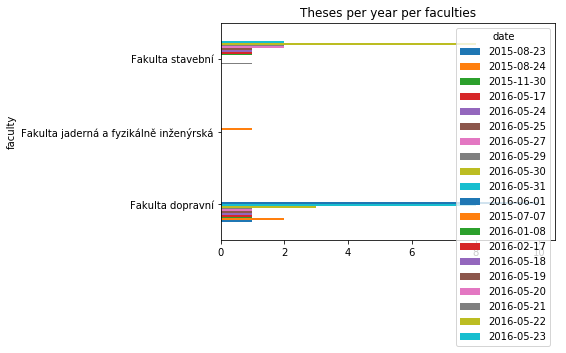

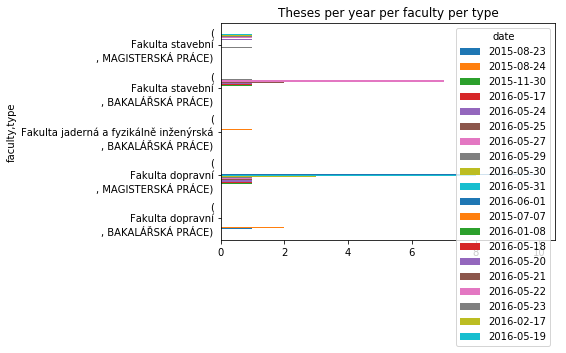

In [4]:
import numpy as np
import pandas as pd
import sklearn as skit
import requests
from bs4 import BeautifulSoup
import tkinter as Tk
from matplotlib import pyplot as plt

'''
#get the csv values
data1 = pd.read_csv("export_final.csv")
'''
data1 = data_all

#rename some of the columns justfor béetter calling later
data1.rename(columns={'issued-date': 'date', 'dc.type':'type', 'degree_grantor' : 'dpt_name'}, inplace=True)

#homogenize columns to be able to strip a part of it later
data1['date']= data1['date'].astype(str)

#converting date to YYYY format
def date_to_year(x):
    y = 0
    for i in data1[x]:
        data1.loc[y,x]=i[0:4]
        y += 1

date_to_year('date')

#removing all rows with nan according to specific columns
data1 = data1[data1.date != 'nan']

#sorting the values for better look when plotting
data1 = data1.sort_values(by='date', ascending = True)

#Number of thesis / faculties / year
data1.groupby(['faculty', 'date'])['date'].count().unstack().plot(kind='barh').set_title('Theses per year per faculties')

#Number of thesis / faculties / year with type of thesis
data1.groupby(['faculty', 'type', 'date'])['date'].count().unstack().plot(kind='barh').set_title('Theses per year per faculty per type')

plt.show()


3) This cell will show you the 10 departments/study programmes/supervisors/reviewers with highest numbers of thesis and come up with some nice plots and tables to depict their numbers.

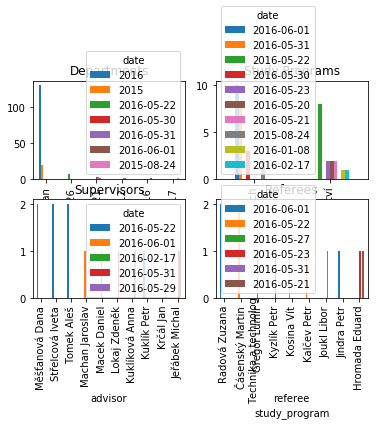

In [6]:
#Here you'll find the code for the second 'plotting' question of the homework
#I've deciding in this part to show 10 values of the parameteres according to their occurences while counting

import numpy as np
import pandas as pd
import sklearn as skit
import requests
from bs4 import BeautifulSoup
import tkinter as Tk
from matplotlib import pyplot as plt

'''
#get the csv values
data1 = pd.read_csv("export_final.csv")
'''
#rename some of the columns for better calling later
data1.rename(columns={'issued-date': 'date', 'dc.type':'type', 'degree_grantor' : 'dpt_name'}, inplace=True)

#homogenize columns to be able to strip a part of it later
data1['date']= data1['date'].astype(str)
data1['dpt_name']= data1['dpt_name'].astype(str)

#converting date to YYYY format
def date_to_year(x):
    y = 0
    for i in data1[x]:
        data1.loc[y,x]=i[0:4]
        y += 1

date_to_year('date')

#cleaning up the dataframe like in the previous question
data1 = data1[data1.date != 'nan']
supervised_theses = data1[data1['advisor'] != 'nan']
data1 = data1.sort_values(by='date', ascending = True)

#setting a size for the plot
fig, axes = plt.subplots(nrows=2, ncols=2)

#grouping the departments according to date and then counting their occurences
department = data1.groupby(['dpt_name', 'date'])['date'].count()
#plotting the occurences but keeping the highest 10 of them with the head() function
department.sort_values(ascending = False).head(10).unstack().plot(ax=axes[0,0], kind='bar').set_title('Departments')

study_program = data1.groupby(['study_program', 'date'])['date'].count()
study_program.sort_values(ascending = False).head(10).unstack().plot(ax=axes[0,1], kind='bar').set_title('Study Programs')

supervisor = data1.groupby(['advisor', 'date'])['date'].count()
supervisor.sort_values(ascending = False).head(10).unstack().plot(ax=axes[1,0], kind='bar').set_title('Supervisors')

referee = data1.groupby(['referee', 'date'])['date'].count()
referee.sort_values(ascending = False).head(10).unstack().plot(ax=axes[1,1], kind='bar').set_title('Referees')

#reviewers
plt.show()